In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('dataset.csv')

In [7]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [9]:
df.tail()

gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 2. Checking for the outliers

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

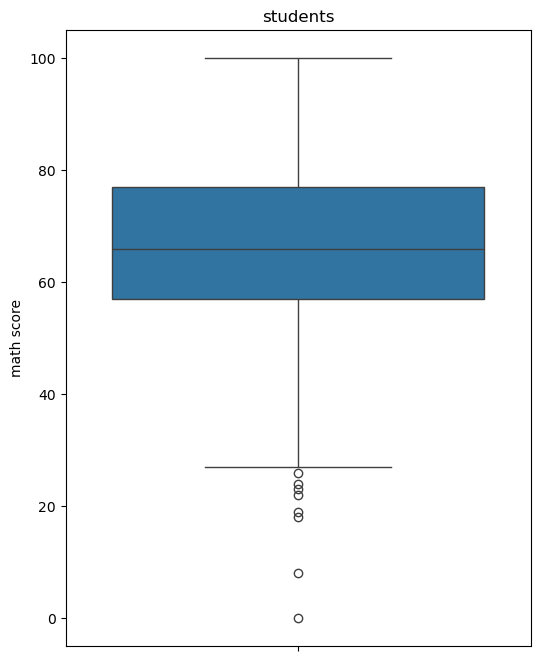

In [29]:
plt.figure(figsize=(6,8))
sns.boxplot(data = df["math score"])
plt.title("students")
plt.show()

In [23]:
q1 = df["math score"].quantile(0.25)
q3 = df["math score"].quantile(0.75)
iqr = q3-q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers = df[ (df["math score"] < lower_bound) | (df["math score"] > upper_bound) ]

outliers

gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
338  female        group B            some high school  free/reduced   
466  female        group D          associate's degree  free/reduced   
787  female        group B                some college      standard   
842  female        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
145                    none          22             39             33  
338                    none          24             38             27  
466                    none          26             31             38  
787                    none          19             38             32  
842               completed          23             44             36  
980                    none           8             24             23

<Axes: ylabel='writing score'>

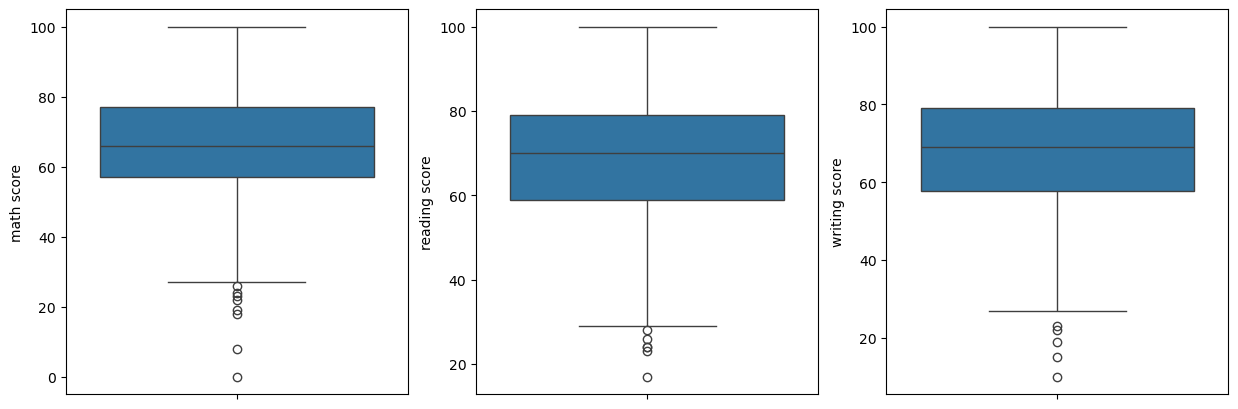

In [35]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data = df['math score'], ax=axes[0])
sns.boxplot(data = df['reading score'], ax=axes[1])
sns.boxplot(data = df['writing score'], ax=axes[2])

<Axes: xlabel='writing score', ylabel='Count'>

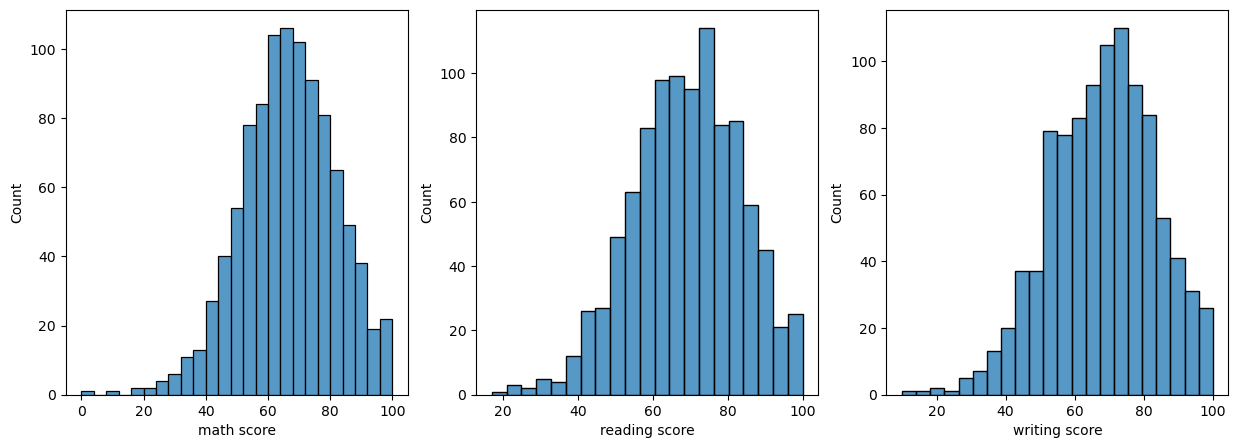

In [39]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.histplot(data = df['math score'], ax=axes[0])
sns.histplot(data = df['reading score'], ax=axes[1])
sns.histplot(data = df['writing score'], ax=axes[2])

In [57]:
def removeOutliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1

        lower_bound = q1 - iqr*1.5
        upper_bound = q3 + iqr*1.5

        df = df[ (df[col] > lower_bound) &  (df[col] < upper_bound) ]

    return df

In [59]:
columns = ['math score', 'reading score', 'writing score']
df = removeOutliers(df, columns)

<Axes: ylabel='writing score'>

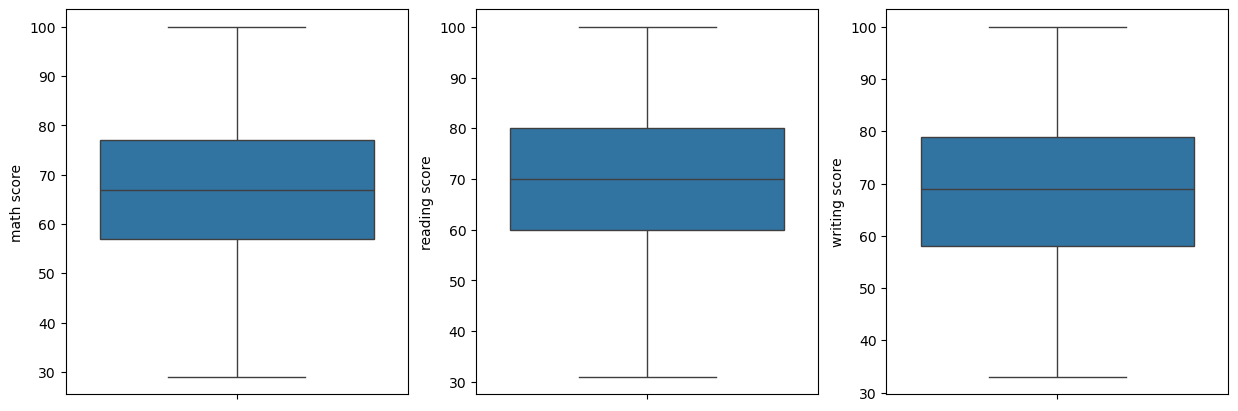

In [61]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data = df['math score'], ax=axes[0])
sns.boxplot(data = df['reading score'], ax=axes[1])
sns.boxplot(data = df['writing score'], ax=axes[2])

<Axes: xlabel='writing score', ylabel='Count'>

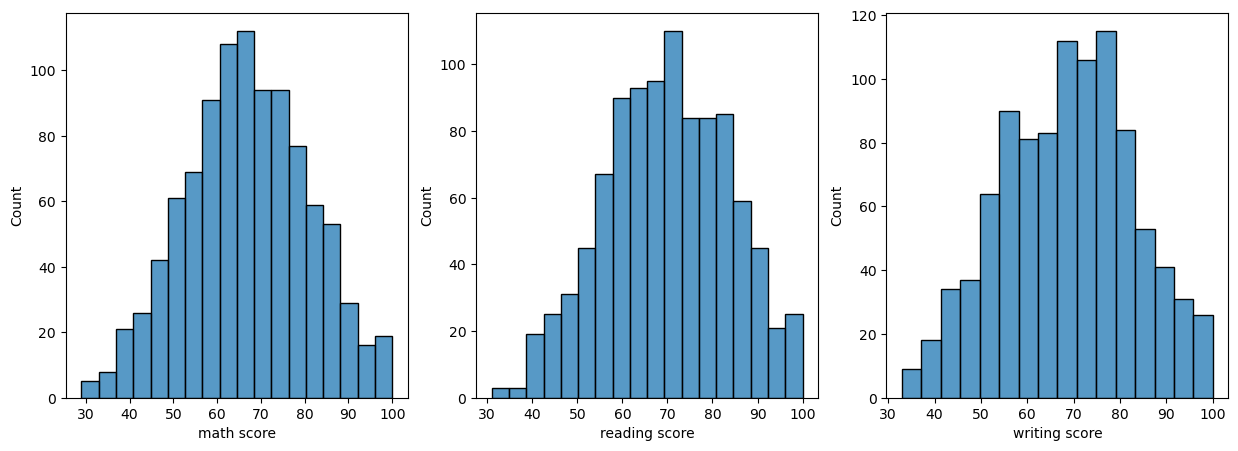

In [63]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.histplot(data = df['math score'], ax=axes[0])
sns.histplot(data = df['reading score'], ax=axes[1])
sns.histplot(data = df['writing score'], ax=axes[2])

In [74]:
df=df.rename(columns={
    "race/ethnicity": "race",
    "parental level of education": "parent_edu",
    "test preparation course": "test_course",
})

## Label Encoding

### Checking value counts

In [78]:
df.race.value_counts()

race
group C    314
group D    260
group B    183
group E    139
group A     88
Name: count, dtype: int64

In [84]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [86]:
df["race"] = encoder.fit_transform(df["race"])

In [88]:
df.head()

gender  race          parent_edu         lunch test_course  math score  \
0  female     1   bachelor's degree      standard        none          72   
1  female     2        some college      standard   completed          69   
2  female     1     master's degree      standard        none          90   
3    male     0  associate's degree  free/reduced        none          47   
4    male     2        some college      standard        none          76   

   reading score  writing score  
0             72             74  
1             90             88  
2             95             93  
3             57             44  
4             78             75

In [90]:
df.gender.value_counts()

gender
female    508
male      476
Name: count, dtype: int64

In [92]:
df["gender"] = encoder.fit_transform(df["gender"])

In [94]:
df

gender  race          parent_edu         lunch test_course  math score  \
0         0     1   bachelor's degree      standard        none          72   
1         0     2        some college      standard   completed          69   
2         0     1     master's degree      standard        none          90   
3         1     0  associate's degree  free/reduced        none          47   
4         1     2        some college      standard        none          76   
..      ...   ...                 ...           ...         ...         ...   
995       0     4     master's degree      standard   completed          88   
996       1     2         high school  free/reduced        none          62   
997       0     2         high school  free/reduced   completed          59   
998       0     3        some college      standard   completed          68   
999       0     3        some college  free/reduced        none          77   

     reading score  writing score  
0               72             74  
1               90             88  
2               95             93  
3               57             44  
4               78             75  
..             ...            ...  
995             99             95  
996             55             55  
997             71             65  
998             78             77  
999             86             86  

[984 rows x 8 columns]

## Min-Max Normalisation

In [97]:
def min_max_normalize(df, columns):
    for col in columns:
        df[col] = ( df[col] - df[col].min() ) / ( df[col].max() - df[col].min() )
    return df

In [99]:
df = min_max_normalize(df, columns)

In [101]:
df

gender  race          parent_edu         lunch test_course  math score  \
0         0     1   bachelor's degree      standard        none    0.605634   
1         0     2        some college      standard   completed    0.563380   
2         0     1     master's degree      standard        none    0.859155   
3         1     0  associate's degree  free/reduced        none    0.253521   
4         1     2        some college      standard        none    0.661972   
..      ...   ...                 ...           ...         ...         ...   
995       0     4     master's degree      standard   completed    0.830986   
996       1     2         high school  free/reduced        none    0.464789   
997       0     2         high school  free/reduced   completed    0.422535   
998       0     3        some college      standard   completed    0.549296   
999       0     3        some college  free/reduced        none    0.676056   

     reading score  writing score  
0         0.594203       0.611940  
1         0.855072       0.820896  
2         0.927536       0.895522  
3         0.376812       0.164179  
4         0.681159       0.626866  
..             ...            ...  
995       0.985507       0.925373  
996       0.347826       0.328358  
997       0.579710       0.477612  
998       0.681159       0.656716  
999       0.797101       0.791045  

[984 rows x 8 columns]

<Axes: ylabel='writing score'>

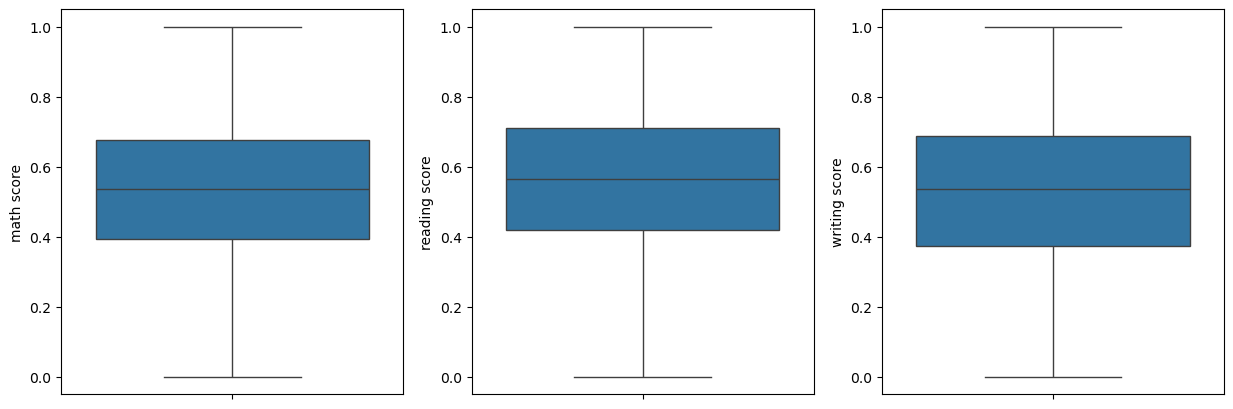

In [105]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(y=df['math score'], ax=axes[0])
sns.boxplot(y=df['reading score'], ax=axes[1])
sns.boxplot(y=df['writing score'], ax=axes[2])